In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split

## **Step 1: Reading diabetes dataset**

In [50]:
data = pd.read_csv("insurance.csv")
data = data.dropna()
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Taking X = BMI

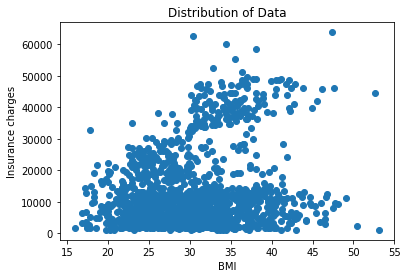

In [75]:
X = data.iloc[:,2]
Y = data.iloc[:,6]
plt.scatter(X, Y)
plt.title('Distribution of Data')
plt.xlabel('BMI')
plt.ylabel('Insurance charges')
plt.show()

## **Step 2: Test Train split**

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=50)

## **Step 3: Inspect dataframe**

In [77]:
X_train.describe().transpose()

count    1070.00000
mean       30.64522
std         6.21838
min        15.96000
25%        26.08375
50%        30.27500
75%        34.86500
max        53.13000
Name: bmi, dtype: float64

## **Step 4: Linear Regression y = mx + c for x = BMI**

**L = 0.01**
**epochs = 100**

In [78]:
m = 0
c = 0
losses = []
val_losses = []

L = 0.01  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent

n_train = float(len(X_train)) 
n_test = float(len(X_test))

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X_train + c 
    Y_val_pred = m*X_test + c  
    
    rmse = np.sqrt((1/n_train) * np.sum((Y_train - Y_pred)**2))
    losses.append(rmse)
    
    rmse_val = np.sqrt((1/n_test) * np.sum((Y_test - Y_val_pred)**2))
    val_losses.append(rmse_val)
    
    D_m = (-2/n_train) * sum(X_train * (Y_train - Y_pred))  # Derivative wrt m
    D_c = (-2/n_train) * sum(Y_train - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

-3.294208982124269e+129 -1.0325199248856212e+128


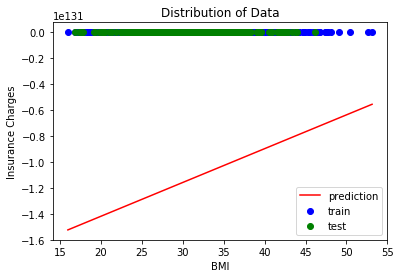

In [79]:
# Making predictions
Y_pred = m*X_test + c

plt.title('Distribution of Data')
plt.scatter(X_train, Y_train, color='blue', label='train')
plt.scatter(X_test, Y_test, color='green', label='test')
#plotting predicted line
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red', label='prediction')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.legend()
plt.show()

Initial loss value : 17728.150542376596
Final loss value : 5.551090218563253e+129
Initial validation loss value : 18868.563713619435
Final validation loss value : 5.546045982391677e+129


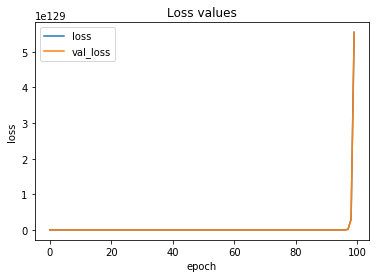

In [80]:
plt.title('Loss values')
plt.plot(losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
print('Initial loss value :', losses[0])
print('Final loss value :', losses[-1])
print('Initial validation loss value :', val_losses[0])
print('Final validation loss value :', val_losses[-1])

**L = 0.001**
**epochs = 100**

In [81]:
m = 0
c = 0
losses = []
val_losses = [] 

L = 0.001  # The learning Rate
epochs = 100 # The number of iterations to perform gradient descent

n_train = float(len(X_train)) # Number of elements in X
n_test = float(len(X_test))

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X_train + c  
    Y_val_pred = m*X_test + c  
    
    rmse = np.sqrt((1/n_train) * np.sum((Y_train - Y_pred)**2))
    losses.append(rmse)
    
    rmse_val = np.sqrt((1/n_test) * np.sum((Y_test - Y_val_pred)**2))
    val_losses.append(rmse_val)
    
    D_m = (-2/n_train) * sum(X_train * (Y_train - Y_pred))  # Derivative wrt m
    D_c = (-2/n_train) * sum(Y_train - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

416.6295520073291 36.77489926542344


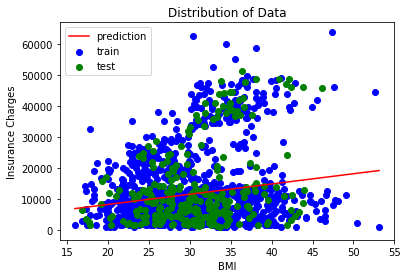

In [82]:
# Making predictions
Y_pred = m*X_test + c

plt.title('Distribution of Data')
plt.scatter(X_train, Y_train, color='blue', label='train')
plt.scatter(X_test, Y_test, color='green', label='test')
#plotting predicted line
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red', label='prediction')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.legend()
plt.show()

Initial loss value : 17728.150542376596
Final loss value : 11796.418537560929
Initial validation loss value : 18868.563713619435
Final validation loss value : 12146.425850991347


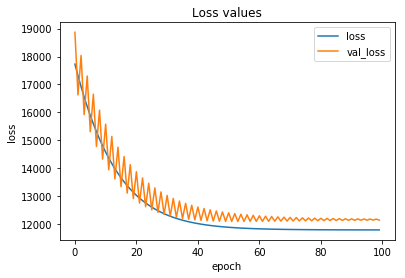

In [83]:
plt.title('Loss values')
plt.plot(losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
print('Initial loss value :', losses[0])
print('Final loss value :', losses[-1])
print('Initial validation loss value :', val_losses[0])
print('Final validation loss value :', val_losses[-1])

**L = 0.0001 epochs = 100**

In [84]:
m1 = 0
c1 = 0
losses = []
val_losses = []

L = 0.0001  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent

n_train = float(len(X_train)) # Number of elements in X
n_test = float(len(X_test))

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m1*X_train + c1  # The current predicted value of Y
    Y_val_pred = m1*X_test + c1  # The current predicted value of Y
    
    rmse = np.sqrt((1/n_train) * np.sum((Y_train - Y_pred)**2))
    losses.append(rmse)
    
    rmse_val = np.sqrt((1/n_test) * np.sum((Y_test - Y_val_pred)**2))
    val_losses.append(rmse_val)
    
    D_m = (-2/n_train) * sum(X_train * (Y_train - Y_pred))  # Derivative wrt m
    D_c = (-2/n_train) * sum(Y_train - Y_pred)  # Derivative wrt c
    m1 = m1 - L * D_m  # Update m
    c1 = c1 - L * D_c  # Update c
    
print (m1, c1)

422.7617921266609 15.630805750836101


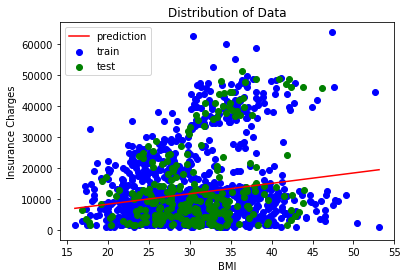

In [85]:
# Making predictions
Y_pred = m1*X_test + c1

plt.title('Distribution of Data')
plt.scatter(X_train, Y_train, color='blue', label='train')
plt.scatter(X_test, Y_test, color='green', label='test')
#plotting predicted line
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red', label='prediction')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.legend()
plt.show()

Initial loss value : 17728.150542376596
Final loss value : 11795.278080900414
Initial validation loss value : 18868.563713619435
Final validation loss value : 12163.135232479957


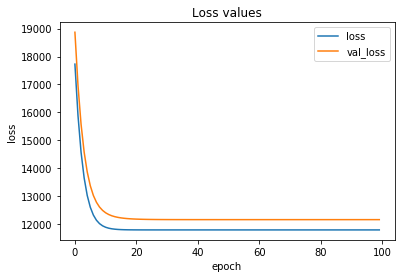

In [86]:
plt.title('Loss values')
plt.plot(losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
print('Initial loss value :', losses[0])
print('Final loss value :', losses[-1])
print('Initial validation loss value :', val_losses[0])
print('Final validation loss value :', val_losses[-1])

**L = 0.00001 epochs = 100**

In [87]:
m = 0
c = 0
losses = []
val_losses = []

L = 0.00001  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent

n_train = float(len(X_train)) # Number of elements in X
n_test = float(len(X_test))

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X_train + c  # The current predicted value of Y
    Y_val_pred = m*X_test + c  # The current predicted value of Y
    
    rmse = np.sqrt((1/n_train) * np.sum((Y_train - Y_pred)**2))
    losses.append(rmse)
    
    rmse_val = np.sqrt((1/n_test) * np.sum((Y_test - Y_val_pred)**2))
    val_losses.append(rmse_val)
    
    D_m = (-2/n_train) * sum(X_train * (Y_train - Y_pred))  # Derivative wrt m
    D_c = (-2/n_train) * sum(Y_train - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

364.26433126601535 11.655395361862062


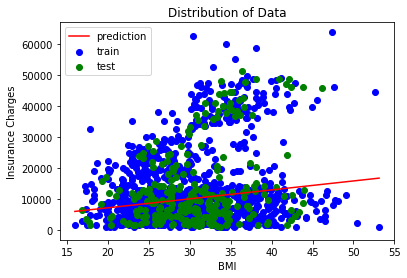

In [88]:
# Making predictions
Y_pred = m*X_test + c

plt.title('Distribution of Data')
plt.scatter(X_train, Y_train, color='blue', label='train')
plt.scatter(X_test, Y_test, color='green', label='test')
#plotting predicted line
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red', label='prediction')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.legend()
plt.show()

Initial loss value : 17728.150542376596
Final loss value : 11942.559312335894
Initial validation loss value : 18868.563713619435
Final validation loss value : 12495.045221256874


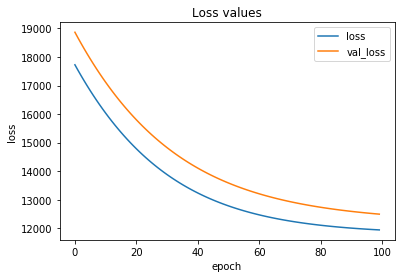

In [89]:
plt.title('Loss values')
plt.plot(losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
print('Initial loss value :', losses[0])
print('Final loss value :', losses[-1])
print('Initial validation loss value :', val_losses[0])
print('Final validation loss value :', val_losses[-1])

**L = 0.000001 epochs = 100**

In [90]:
m = 0
c = 0
losses = []
val_losses = []

L = 0.000001  # The learning Rate
epochs = 100  # The number of iterations to perform gradient descent

n_train = float(len(X_train)) # Number of elements in X
n_test = float(len(X_test))

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X_train + c  # The current predicted value of Y
    Y_val_pred = m*X_test + c  # The current predicted value of Y
    
    rmse = np.sqrt((1/n_train) * np.sum((Y_train - Y_pred)**2))
    losses.append(rmse)
    
    rmse_val = np.sqrt((1/n_test) * np.sum((Y_test - Y_val_pred)**2))
    val_losses.append(rmse_val)
    
    D_m = (-2/n_train) * sum(X_train * (Y_train - Y_pred))  # Derivative wrt m
    D_c = (-2/n_train) * sum(Y_train - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

75.23678853901248 2.381992197692468


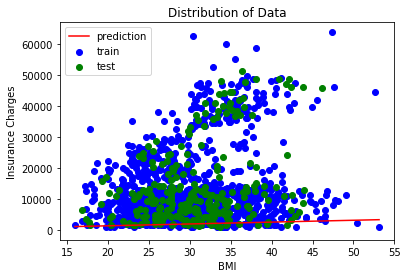

In [91]:
# Making predictions
Y_pred = m*X_test + c

plt.title('Distribution of Data')
plt.scatter(X_train, Y_train, color='blue', label='train')
plt.scatter(X_test, Y_test, color='green', label='test')
#plotting predicted line
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red', label='prediction')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.legend()
plt.show()

Initial loss value : 17728.150542376596
Final loss value : 16061.26085694319
Initial validation loss value : 18868.563713619435
Final validation loss value : 17144.692154618482


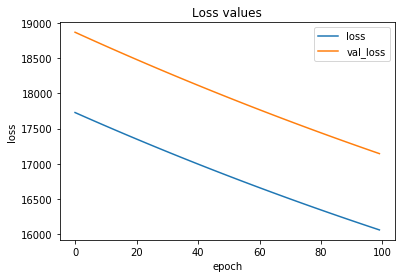

In [92]:
plt.title('Loss values')
plt.plot(losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
print('Initial loss value :', losses[0])
print('Final loss value :', losses[-1])
print('Initial validation loss value :', val_losses[0])
print('Final validation loss value :', val_losses[-1])

**L = 0.000001 epochs = 1000**

In [93]:
m = 0
c = 0
losses = []
val_losses = []

L = 0.000001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n_train = float(len(X_train)) # Number of elements in X
n_test = float(len(X_test))

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X_train + c  # The current predicted value of Y
    Y_val_pred = m*X_test + c  # The current predicted value of Y
    
    rmse = np.sqrt((1/n_train) * np.sum((Y_train - Y_pred)**2))
    losses.append(rmse)
    
    rmse_val = np.sqrt((1/n_test) * np.sum((Y_test - Y_val_pred)**2))
    val_losses.append(rmse_val)
    
    D_m = (-2/n_train) * sum(X_train * (Y_train - Y_pred))  # Derivative wrt m
    D_c = (-2/n_train) * sum(Y_train - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

363.23082660259985 11.623001638534447


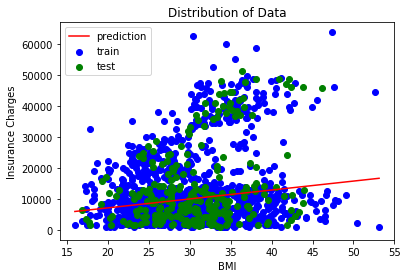

In [94]:
# Making predictions
Y_pred = m*X_test + c

plt.title('Distribution of Data')
plt.scatter(X_train, Y_train, color='blue', label='train')
plt.scatter(X_test, Y_test, color='green', label='test')
#plotting predicted line
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red', label='prediction')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.legend()
plt.show()

Initial loss value : 17728.150542376596
Final loss value : 11942.466877587498
Initial validation loss value : 18868.563713619435
Final validation loss value : 12494.897756298937


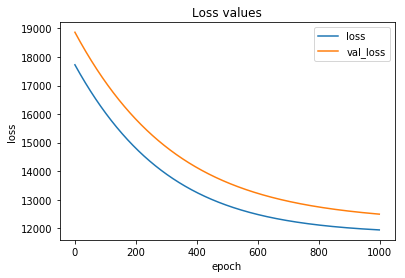

In [95]:
plt.title('Loss values')
plt.plot(losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
print('Initial loss value :', losses[0])
print('Final loss value :', losses[-1])
print('Initial validation loss value :', val_losses[0])
print('Final validation loss value :', val_losses[-1])

## **Step 5: Prediction of Values**

In [110]:
Y_test.head()

589     5976.8311
383     5846.9176
534    13831.1152
284     9625.9200
821     2680.9493
Name: charges, dtype: float64

Prediction example 1:

In [108]:
Y_pred = m1 * X_test[786] + c1
print("Predicted value is", Y_pred)
print("Actual value is", Y_test[786])

Predicted value is 15638.79283379159
Actual value is 12741.16745


Prediction example 2:

In [109]:
Y_pred = m1 * X_test[853] + c1
print("Predicted value is", Y_pred)
print("Actual value is", Y_test[853])

Predicted value is 10056.223368759032
Actual value is 11729.6795


Prediction example 3:

In [107]:
Y_pred = m1 * X_test[231] + c1
print("Predicted value is", Y_pred)
print("Actual value is", Y_test[231])

Predicted value is 11781.091480635809
Actual value is 14001.2867
